In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from nltk import PorterStemmer
import torch.nn.functional as F
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

## Read datasets

In [32]:
train_df= pd.read_csv("data/train.csv")
test_df = pd.read_csv('data/test.csv')

print(" Shape of tran data :: ", train_df.shape)
print(" Train data columns", train_df.columns)
print(" Test columns", test_df.columns)
train_df.head()

 Shape of tran data ::  (320552, 8)
 Train data columns Index(['id', 'tid1', 'tid2', 'title1_zh', 'title2_zh', 'title1_en',
       'title2_en', 'label'],
      dtype='object')
 Test columns Index(['id', 'tid1', 'tid2', 'title1_zh', 'title2_zh', 'title1_en',
       'title2_en'],
      dtype='object')


,id,tid1,tid2,title1_zh,title2_zh,title1_en,title2_en,label
0,0,0,1,2017养老保险又新增两项，农村老人人人可申领，你领到了吗,警方辟谣“鸟巢大会每人领5万” 仍有老人坚持进京,There are two new old-age insurance benefits for old people in rural areas. Have you got them?,"Police disprove ""bird's nest congress each person gets 50,000 yuan"" still old people insist on going to beijing",unrelated
1,3,2,3,"""你不来深圳，早晚你儿子也要来""，不出10年深圳人均GDP将超香港",深圳GDP首超香港？深圳统计局辟谣：只是差距在缩小,"""If you do not come to Shenzhen, sooner or later your son will also come."" In less than 10 years, Shenzhen per capita GDP will exceed Hong Kong.",Shenzhen's GDP outstrips Hong Kong? Shenzhen Statistics Bureau dismisses rumors: only the gap is narrowing,unrelated
2,1,2,4,"""你不来深圳，早晚你儿子也要来""，不出10年深圳人均GDP将超香港",GDP首超香港？深圳澄清：还差一点点……,"""If you do not come to Shenzhen, sooner or later your son will also come."" In less than 10 years, Shenzhen per capita GDP will exceed Hong Kong.",The GDP overtopped Hong Kong? Shenzhen clarified: a little bit more......,unrelated
3,2,2,5,"""你不来深圳，早晚你儿子也要来""，不出10年深圳人均GDP将超香港",去年深圳GDP首超香港？深圳统计局辟谣：还差611亿,"""If you do not come to Shenzhen, sooner or later your son will also come."" In less than 10 years, Shenzhen per capita GDP will exceed Hong Kong.",Shenzhen's GDP topped Hong Kong last year? Shenzhen Bureau of Statistics refutes rumors: 61.1 billion,unrelated
4,9,6,7,"""用大蒜鉴别地沟油的方法,怎么鉴别地沟油",吃了30年食用油才知道，一片大蒜轻松鉴别地沟油,"""How to discriminate oil from gutter oil by means of garlic.",It took 30 years of cooking oil to know that one piece of garlic is easy to spot.,agreed


In [33]:
test_df.head()

,id,tid1,tid2,title1_zh,title2_zh,title1_en,title2_en
0,321187,167562,59521,萨拉赫人气爆棚!埃及总统大选未参选获百万选票 现任总统压力山大,辟谣！里昂官方否认费基尔加盟利物浦，难道是价格没谈拢？,egypt 's presidential election failed to win millions of votes in egypt' s presidential election,Lyon! Lyon officials have denied that Felipe Federico has joined Liverpool. Is it true that the price has not been agreed?
1,321190,167564,91315,萨达姆被捕后告诫美国的一句话，发人深思,10大最让美国人相信的荒诞谣言，如蜥蜴人掌控着美国,A message from Saddam Hussein after he was captured,The Top 10 Americans believe that the Lizard Man controls the United States
2,321189,167563,167564,萨达姆此项计划没有此国破坏的话，美国还会对伊拉克发动战争吗,萨达姆被捕后告诫美国的一句话，发人深思,Will the United States wage war on Iraq without the destruction of Saddam Hussein?,A message from Saddam Hussein after he was captured
3,321193,167564,160994,萨达姆被捕后告诫美国的一句话，发人深思,被绞刑处死的萨达姆是替身？他的此男人举动击破替身谣言！,A message from Saddam Hussein after he was captured,The hanging Saddam is a surrogate? This man's move to destroy the douchebag!
4,321191,167564,15084,萨达姆被捕后告诫美国的一句话，发人深思,中国川贝枇杷膏在美国受到热捧？纯属谣言！,A message from Saddam Hussein after he was captured,Chinese loquat loquat plaster in America? Pure rumor!


In [34]:
title1_en_len = train_df.title1_en.str.split().str.len()
title1_en_len.describe()

count    320552.000000
mean     16.383713    
std      7.898818     
min      1.000000     
25%      12.000000    
50%      16.000000    
75%      20.000000    
max      500.000000   
Name: title1_en, dtype: float64

In [35]:
title2_en_len = train_df.title2_en.str.split().str.len()
title2_en_len.describe()

count    320552.000000
mean     16.572637    
std      8.359216     
min      0.000000     
25%      13.000000    
50%      16.000000    
75%      20.000000    
max      539.000000   
Name: title2_en, dtype: float64

# Distribution of labels in the dataset

In [36]:
train_df.label.value_counts() 

unrelated    219313
agreed       92973 
disagreed    8266  
Name: label, dtype: int64

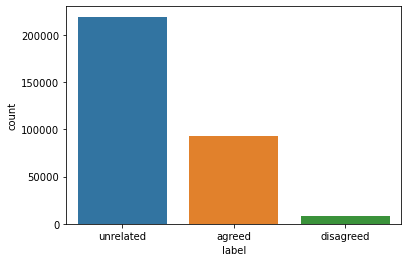

In [37]:
sns.countplot(x="label", data=train_df);
plt.show()
#pd.value_counts(train_df['label']).plot.bar()

In [38]:
## Constants Used for cleaning the datasets
column_names = ['id', 'tid1', 'tid2', 'title1_zh', 'title2_zh', 'title1_en', 'title2_en', 'label']
remove_columns = ['id', 'tid1', 'tid2', 'title1_zh', 'title2_zh']
text_features = ['title1_en', 'title2_en']

In [39]:
train_df = train_df.drop(remove_columns,axis=1)
test_df = test_df.drop(remove_columns,axis=1)

In [40]:
train_df.head()

,title1_en,title2_en,label
0,There are two new old-age insurance benefits for old people in rural areas. Have you got them?,"Police disprove ""bird's nest congress each person gets 50,000 yuan"" still old people insist on going to beijing",unrelated
1,"""If you do not come to Shenzhen, sooner or later your son will also come."" In less than 10 years, Shenzhen per capita GDP will exceed Hong Kong.",Shenzhen's GDP outstrips Hong Kong? Shenzhen Statistics Bureau dismisses rumors: only the gap is narrowing,unrelated
2,"""If you do not come to Shenzhen, sooner or later your son will also come."" In less than 10 years, Shenzhen per capita GDP will exceed Hong Kong.",The GDP overtopped Hong Kong? Shenzhen clarified: a little bit more......,unrelated
3,"""If you do not come to Shenzhen, sooner or later your son will also come."" In less than 10 years, Shenzhen per capita GDP will exceed Hong Kong.",Shenzhen's GDP topped Hong Kong last year? Shenzhen Bureau of Statistics refutes rumors: 61.1 billion,unrelated
4,"""How to discriminate oil from gutter oil by means of garlic.",It took 30 years of cooking oil to know that one piece of garlic is easy to spot.,agreed


In [41]:
test_df.head()

,title1_en,title2_en
0,egypt 's presidential election failed to win millions of votes in egypt' s presidential election,Lyon! Lyon officials have denied that Felipe Federico has joined Liverpool. Is it true that the price has not been agreed?
1,A message from Saddam Hussein after he was captured,The Top 10 Americans believe that the Lizard Man controls the United States
2,Will the United States wage war on Iraq without the destruction of Saddam Hussein?,A message from Saddam Hussein after he was captured
3,A message from Saddam Hussein after he was captured,The hanging Saddam is a surrogate? This man's move to destroy the douchebag!
4,A message from Saddam Hussein after he was captured,Chinese loquat loquat plaster in America? Pure rumor!


In [42]:
train_df['title']=train_df[text_features].agg(' '.join, axis=1)
test_df['title']=test_df[text_features].agg(' '.join, axis=1)

In [43]:
train_df = train_df[["title","label"]]

In [44]:
pd.set_option('display.max_colwidth', -1)

<ipython-input-44-0891b765a168>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [45]:
train_df.head()

,title,label
0,"There are two new old-age insurance benefits for old people in rural areas. Have you got them? Police disprove ""bird's nest congress each person gets 50,000 yuan"" still old people insist on going to beijing",unrelated
1,"""If you do not come to Shenzhen, sooner or later your son will also come."" In less than 10 years, Shenzhen per capita GDP will exceed Hong Kong. Shenzhen's GDP outstrips Hong Kong? Shenzhen Statistics Bureau dismisses rumors: only the gap is narrowing",unrelated
2,"""If you do not come to Shenzhen, sooner or later your son will also come."" In less than 10 years, Shenzhen per capita GDP will exceed Hong Kong. The GDP overtopped Hong Kong? Shenzhen clarified: a little bit more......",unrelated
3,"""If you do not come to Shenzhen, sooner or later your son will also come."" In less than 10 years, Shenzhen per capita GDP will exceed Hong Kong. Shenzhen's GDP topped Hong Kong last year? Shenzhen Bureau of Statistics refutes rumors: 61.1 billion",unrelated
4,"""How to discriminate oil from gutter oil by means of garlic. It took 30 years of cooking oil to know that one piece of garlic is easy to spot.",agreed


In [46]:
test_df = test_df[["title"]]

In [47]:
test_df.head()

,title
0,egypt 's presidential election failed to win millions of votes in egypt' s presidential election Lyon! Lyon officials have denied that Felipe Federico has joined Liverpool. Is it true that the price has not been agreed?
1,A message from Saddam Hussein after he was captured The Top 10 Americans believe that the Lizard Man controls the United States
2,Will the United States wage war on Iraq without the destruction of Saddam Hussein? A message from Saddam Hussein after he was captured
3,A message from Saddam Hussein after he was captured The hanging Saddam is a surrogate? This man's move to destroy the douchebag!
4,A message from Saddam Hussein after he was captured Chinese loquat loquat plaster in America? Pure rumor!


# Function to Clean the Text

In [48]:
 # Defining a Function to Clean the Textual Data
def clean_text(txt):
    txt = txt.lower() #Lowering the text
    txt = re.sub(r'\W', ' ', str(txt)) # remove all special characters including apastrophie 
    txt = txt.translate(str.maketrans('', '', string.punctuation)) # remove punctuations
    txt = ''.join([i for i in txt if not i.isdigit()]).strip() # remove digits ()
    txt = re.sub(r'\s+[a-zA-Z]\s+', ' ', txt)   # remove all single characters (it's -> it s then we remove s)
    txt = re.sub(r'\s+', ' ', txt, flags=re.I) # Substituting multiple spaces with single space
    txt = re.sub(r"(http\S+|http)", "", txt) # remove links
    txt = ' '.join([PorterStemmer().stem(word=word) for word in txt.split(" ") 
                    if word not in stopwords.words('english') ]) # stem & remove stop words
    return txt

In [49]:
print('Original Text : ',train_df['title'][1])  
print('Processed Text : ',clean_text(train_df['title'][1]))

Original Text :  "If you do not come to Shenzhen, sooner or later your son will also come." In less than 10 years, Shenzhen per capita GDP will exceed Hong Kong. Shenzhen's GDP outstrips Hong Kong? Shenzhen Statistics Bureau dismisses rumors: only the gap is narrowing
Processed Text :  come shenzhen sooner later son also come less year shenzhen per capita gdp exceed hong kong shenzhen gdp outstrip hong kong shenzhen statist bureau dismiss rumor gap narrow


# Applying the Function to the Dataset

In [50]:
train_df['title'] = train_df['title'].apply(clean_text) #apply the function to every text in the dataset
train_df

,title,label
0,two new old age insur benefit old peopl rural area got polic disprov bird nest congress person get yuan still old peopl insist go beij,unrelated
1,come shenzhen sooner later son also come less year shenzhen per capita gdp exceed hong kong shenzhen gdp outstrip hong kong shenzhen statist bureau dismiss rumor gap narrow,unrelated
2,come shenzhen sooner later son also come less year shenzhen per capita gdp exceed hong kong gdp overtop hong kong shenzhen clarifi littl bit,unrelated
3,come shenzhen sooner later son also come less year shenzhen per capita gdp exceed hong kong shenzhen gdp top hong kong last year shenzhen bureau statist refut rumor billion,unrelated
4,discrimin oil gutter oil mean garlic took year cook oil know one piec garlic easi spot,agreed
...,...,...
320547,egypt presidenti elect fail win million vote egypt presidenti elect west media expos tallahlach recommend barca agent discredit happen,unrelated
320548,egypt presidenti elect fail win million vote egypt presidenti elect salah agent dishonest rumour rumour barcelona,unrelated
320549,egypt presidenti elect fail win million vote egypt presidenti elect rumor egypt unit differ us,unrelated
320550,egypt presidenti elect fail win million vote egypt presidenti elect fals rumor egypt footbal associ chairman salah leav earli,unrelated


# Defining the Parameters and Tokenizer

In [51]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 2000
# Max number of words in each Content.
MAX_SEQUENCE_LENGTH = 600
# This is fixed. Embedding
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(train_df['title'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 28549 unique tokens.


In [52]:
 #Tokenizing the title
X = tokenizer.texts_to_sequences(train_df['title'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape[1])

Shape of data tensor: 600


In [53]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(train_df['label'])
print(y.shape)
print(le.classes_)
y.dtype

(320552,)
['agreed' 'disagreed' 'unrelated']


dtype('int64')

# Splitting Dataset to Train and Test Data

In [54]:
#Train and Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=1234)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(256441, 600) (256441,) (64111, 600) (64111,)


In [55]:
#Converting data into Torch and getting it into CPU
x_train = torch.tensor(X_train, dtype=torch.long)
y_train = torch.tensor(y_train, dtype=torch.long)
x_cv = torch.tensor(X_test, dtype=torch.long)
y_cv = torch.tensor(y_test, dtype=torch.long)

# Converting dataset to a Torch Datset

In [56]:
train = torch.utils.data.TensorDataset(x_train, y_train)
valid = torch.utils.data.TensorDataset(x_cv, y_cv)

In [57]:
# Defing the Parameters:
max_features =  2000  
batch_size = 50
vocab_size = max_features

# Initialising the DataLoaders
train_dl = torch.utils.data.DataLoader(train, batch_size=batch_size, shuffle=True)
val_dl = torch.utils.data.DataLoader(valid, batch_size=batch_size, shuffle=False)

# Defining the Model

In [58]:
class LSTM(torch.nn.Module) :
    def __init__(self, vocab_size, embedding_dim, hidden_dim) : # 
        super().__init__()
        self.hidden_dim = hidden_dim
        self.embeddings = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)
        #2 layer lstm
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.lstm1 = nn.LSTM(hidden_dim, 64, batch_first=True)
        #linear layer (gives the output)
        self.linear = nn.Linear(64, 3)
        
    def forward(self, x):
        x = self.embeddings(x)
        out_pack, (ht, ct) = self.lstm(x)
        out_pack1, (ht, ct) = self.lstm1(out_pack)
        out = self.linear(ht[-1])
        #out = self.softmax(out)
        return out

# Structure of the Model

In [59]:
#intializing model
model = LSTM(vocab_size, 128,64)
print(model)

LSTM(
  (embeddings): Embedding(2000, 128, padding_idx=0)
  (lstm): LSTM(128, 64, batch_first=True)
  (lstm1): LSTM(64, 64, batch_first=True)
  (linear): Linear(in_features=64, out_features=3, bias=True)
)


# Model Tranining And Validation

In [ ]:
# Defining Train Loop:
n_epochs = 10

loss_fn = nn.CrossEntropyLoss() # Loss Function
optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # Optimiser

train_loss = []
valid_loss = []
for epoch in range(n_epochs):
    
    start_time = time.time()
    #Set model to train configuration
    model.train() # indicator for training
    avg_loss = 0.  
    for i, (x_batch, y_batch) in enumerate(train_dl):
        # Predict/Forward Pass
        y_pred = model(x_batch)
        # Compute loss
        loss = loss_fn(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward() 
        optimizer.step()
        avg_loss += loss.item() / len(train_dl)
          
    #Set model to validation configuration
    model.eval() # Indicator for Validation       
    avg_val_loss = 0.
    val_preds = np.zeros((len(x_cv),len(le.classes_)))
    
    for i, (x_batch, y_batch) in enumerate(val_dl):
        y_pred = model(x_batch).detach()
        avg_val_loss += loss_fn(y_pred, y_batch).item() / len(val_dl)

        #keep/store predictions
        val_preds[i * batch_size:(i+1) * batch_size] =F.softmax(y_pred).cpu().numpy()
          
    # Check Accuracy
    val_accuracy = sum(val_preds.argmax(axis=1)==y_test)/len(y_test)
    train_loss.append(avg_loss)
    valid_loss.append(avg_val_loss)
    elapsed_time = time.time() - start_time 
    print('Epoch {}/{} \t loss={:.4f} \t val_loss={:.4f}  \t val_acc={:.4f}  \t time={:.2f}s'.format(epoch + 1, n_epochs, avg_loss, avg_val_loss, val_accuracy, elapsed_time))



# Plotting the Loss

In [ ]:
#loss vs epoch graph
def plot_graph(epochs):
    fig = plt.figure(figsize=(6,6))
    plt.title("Train/Validation Loss")
    plt.plot(list(np.arange(epochs) + 1) , train_loss, label='train') # X axis 
    plt.plot(list(np.arange(epochs) + 1), valid_loss, label='validation') # Y axis
    plt.xlabel('num_epochs', fontsize=12)
    plt.ylabel('loss', fontsize=12)
    plt.legend(loc='best')

In [ ]:
plot_graph(n_epochs)

# Prediction

## Process test data

In [ ]:
#test_df['title'] = test_df['title'].apply(clean_text) #apply the function to every text in the dataset
#test_df

In [ ]:
#tokenizer.fit_on_texts(test_df['title'].values)
#word_index = tokenizer.word_index
#print('Found %s unique tokens.' % len(word_index))

In [ ]:
#Tokenizing the content
#X = tokenizer.texts_to_sequences(test_df['title'].values)
#X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
#print('Shape of data tensor:', X.shape[1])

In [ ]:
### Make predictions

In [ ]:
#model.predict(X,128,64)

### Visualize confusion matrix

In [58]:
#conf_mat = confusion_matrix(y_test, y_pred)

In [ ]:
#conf_mat

In [60]:
#conf_mat = pd.DataFrame(conf_mat, columns=model.classes_, index=model.classes_)

In [ ]:
#conf_mat

In [ ]:
#sns.heatmap(conf_mat)
#plt.show()

In [ ]:
# Metrics Performance
#print(classification_report(y_test,y_pred))